In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
file_path = "exported_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Clean data: Drop rows with missing ESG grades
esg_df = df[['deforestation_grade', 'gender_equality_grade', 'net_assets', 'returns_1y']].dropna()

In [4]:
# 1. Distribution of Grades
deforestation_counts = esg_df['deforestation_grade'].value_counts().sort_index()
gender_eq_counts = esg_df['gender_equality_grade'].value_counts().sort_index()

C:\Users\vidya\AppData\Local\Temp\ipykernel_26596\2001009964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deforestation_counts.index, y=deforestation_counts.values, palette="YlGn")
C:\Users\vidya\AppData\Local\Temp\ipykernel_26596\2001009964.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_eq_counts.index, y=gender_eq_counts.values, palette="PuBu")


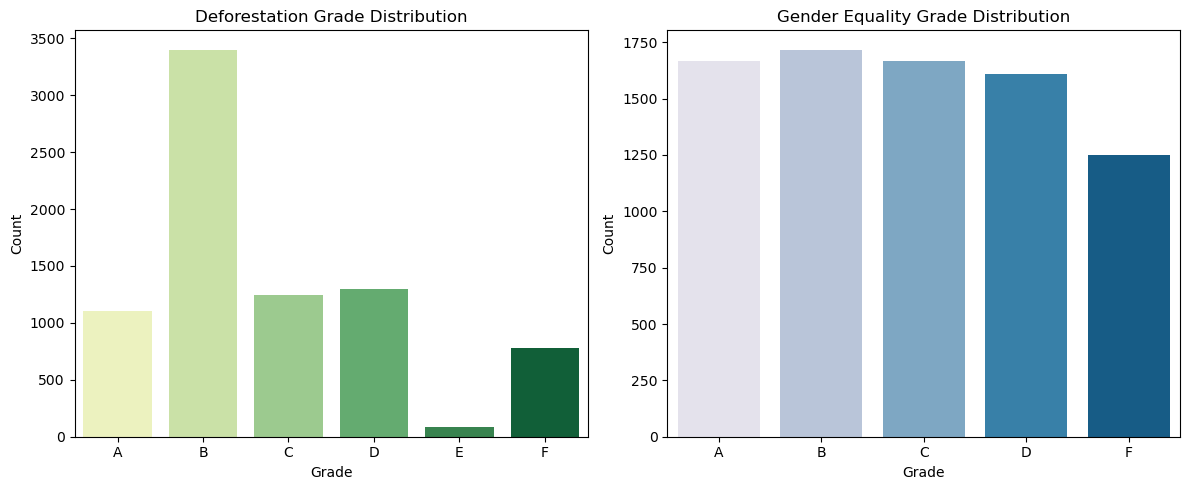

In [5]:
# Plotting distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=deforestation_counts.index, y=deforestation_counts.values, palette="YlGn")
plt.title("Deforestation Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.barplot(x=gender_eq_counts.index, y=gender_eq_counts.values, palette="PuBu")
plt.title("Gender Equality Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [6]:
# 2. Cross-tab of grades
cross_tab = pd.crosstab(esg_df['deforestation_grade'], esg_df['gender_equality_grade'])
print("Cross-tabulation of Deforestation vs Gender Equality Grades:")
print(cross_tab)

Cross-tabulation of Deforestation vs Gender Equality Grades:
gender_equality_grade    A    B    C    D    F
deforestation_grade                           
A                      117  102  199  251  436
B                      787  746  655  670  542
C                      257  374  254  250  109
D                      256  279  363  297  103
E                       38   17   12   16    3
F                      214  199  183  126   58


In [7]:
# 3. Compare average 1Y returns by grade
returns_by_deforestation = df.groupby('deforestation_grade')['returns_1y'].mean().sort_index()
returns_by_gender = df.groupby('gender_equality_grade')['returns_1y'].mean().sort_index()

In [8]:
# 4. Average net assets by grade
assets_by_deforestation = df.groupby('deforestation_grade')['net_assets'].mean().sort_index()
assets_by_gender = df.groupby('gender_equality_grade')['net_assets'].mean().sort_index()

# Output summaries
print("\nAverage 1Y Returns by Deforestation Grade:\n", returns_by_deforestation)
print("\nAverage 1Y Returns by Gender Equality Grade:\n", returns_by_gender)

print("\nAverage Net Assets by Deforestation Grade:\n", assets_by_deforestation)
print("\nAverage Net Assets by Gender Equality Grade:\n", assets_by_gender)


Average 1Y Returns by Deforestation Grade:
 deforestation_grade
A   -14.629683
B   -18.109820
C   -15.304112
D   -14.718001
E   -18.786571
F   -13.896633
Name: returns_1y, dtype: float64

Average 1Y Returns by Gender Equality Grade:
 gender_equality_grade
A   -11.270912
B   -14.764537
C   -17.065583
D   -17.295116
F   -19.199361
Name: returns_1y, dtype: float64

Average Net Assets by Deforestation Grade:
 deforestation_grade
A    2.004070e+09
B    4.749827e+09
C    2.701959e+10
D    1.670048e+10
E    1.043689e+09
F    2.687988e+09
Name: net_assets, dtype: float64

Average Net Assets by Gender Equality Grade:
 gender_equality_grade
A    1.165602e+10
B    1.415346e+10
C    1.252673e+10
D    5.916161e+09
F    3.792173e+09
Name: net_assets, dtype: float64


In [9]:
# Map ESG grades to numeric scores
grade_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}

In [10]:
# Prepare and clean dataset
esg_df = df[['deforestation_grade', 'gender_equality_grade', 'net_assets', 'returns_1y']].dropna()
esg_df['deforestation_score'] = esg_df['deforestation_grade'].map(grade_map)
esg_df['gender_equality_score'] = esg_df['gender_equality_grade'].map(grade_map)

In [11]:
# 1. Composite ESG Score
esg_df['esg_composite_score'] = esg_df[['deforestation_score', 'gender_equality_score']].mean(axis=1)

In [12]:
# 2. Correlation Analysis
correlation_matrix = esg_df[['deforestation_score', 'gender_equality_score', 'esg_composite_score', 'returns_1y']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                        deforestation_score  gender_equality_score  \
deforestation_score               1.000000              -0.184250   
gender_equality_score            -0.184250               1.000000   
esg_composite_score               0.575116               0.702396   
returns_1y                       -0.103084               0.205272   

                       esg_composite_score  returns_1y  
deforestation_score               0.575116   -0.103084  
gender_equality_score             0.702396    0.205272  
esg_composite_score               1.000000    0.095711  
returns_1y                        0.095711    1.000000  


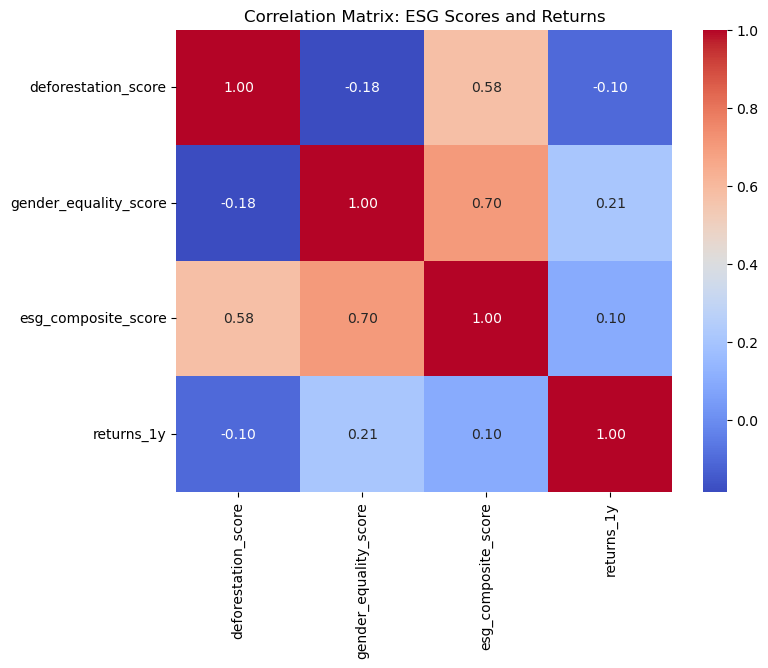

In [13]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: ESG Scores and Returns")
plt.show()

In [14]:
# 3. ESG Quartile Analysis
esg_df['esg_quartile'] = pd.qcut(esg_df['esg_composite_score'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
returns_by_quartile = esg_df.groupby('esg_quartile')['returns_1y'].describe()
print("\nReturns by ESG Score Quartile:\n", returns_by_quartile)


Returns by ESG Score Quartile:
                count       mean        std       min        25%       50%  \
esg_quartile                                                                
Low           2249.0 -16.742148   9.406418 -48.94592 -22.608750 -17.08478   
Medium        1865.0 -16.324347  14.881125 -67.53849 -24.953320 -16.28048   
High          2755.0 -16.015601  11.955004 -51.52473 -22.907260 -15.38665   
Very High     1044.0 -11.720004  13.877722 -42.71240 -19.027082 -12.90263   

                    75%       max  
esg_quartile                       
Low          -11.737090  43.29473  
Medium        -9.491080  97.98976  
High         -10.024455  87.60169  
Very High     -6.155568  78.61654  


C:\Users\vidya\AppData\Local\Temp\ipykernel_26596\4104146335.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returns_by_quartile = esg_df.groupby('esg_quartile')['returns_1y'].describe()


C:\Users\vidya\AppData\Local\Temp\ipykernel_26596\2719702564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='esg_quartile', y='returns_1y', data=esg_df, palette="Set2")


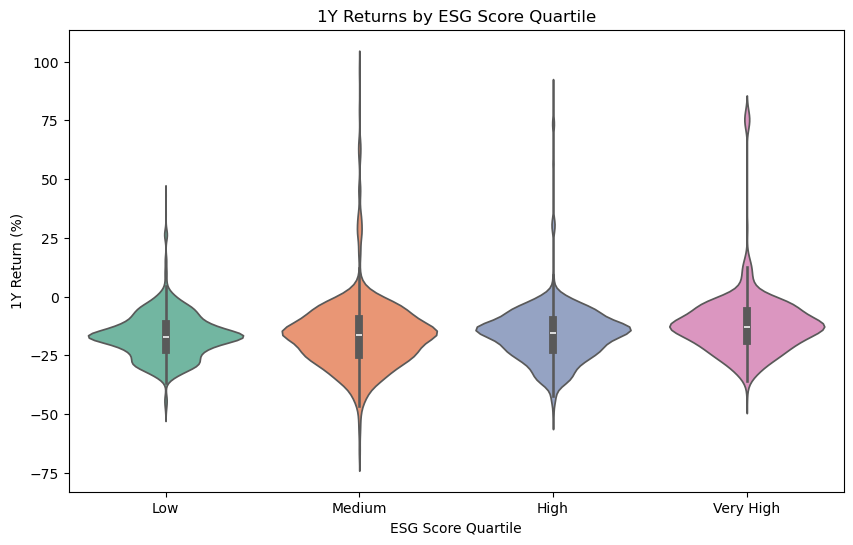

In [15]:
# Violin plot of returns by ESG quartile
plt.figure(figsize=(10, 6))
sns.violinplot(x='esg_quartile', y='returns_1y', data=esg_df, palette="Set2")
plt.title("1Y Returns by ESG Score Quartile")
plt.ylabel("1Y Return (%)")
plt.xlabel("ESG Score Quartile")
plt.show()

In [16]:
# 4. Top Performing ESG Funds
top_funds = esg_df.sort_values(by=['esg_composite_score', 'returns_1y'], ascending=[False, False]).head(10)
print("\nTop Performing ESG Funds:\n", top_funds[['deforestation_grade', 'gender_equality_grade', 'esg_composite_score', 'returns_1y']])


Top Performing ESG Funds:
      deforestation_grade gender_equality_grade  esg_composite_score  \
7955                   A                     A                  5.0   
3190                   A                     A                  5.0   
7956                   A                     A                  5.0   
7103                   A                     A                  5.0   
5560                   A                     A                  5.0   
5559                   A                     A                  5.0   
1728                   A                     A                  5.0   
3316                   A                     A                  5.0   
3898                   A                     A                  5.0   
3895                   A                     A                  5.0   

      returns_1y  
7955    74.06873  
3190    74.01446  
7956    73.97345  
7103    73.92876  
5560    73.78888  
5559    73.14136  
1728    72.86042  
3316    16.01330  
3898    12.25482  


C:\Users\vidya\AppData\Local\Temp\ipykernel_26596\3668445236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


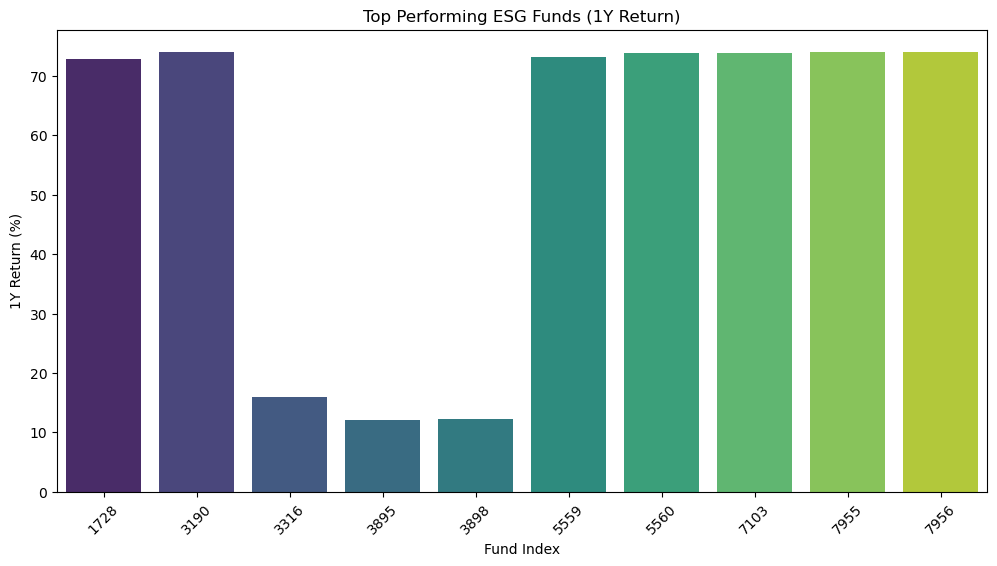

In [17]:
# Bar plot for top ESG funds
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_funds.index,
    y=top_funds['returns_1y'],
    palette="viridis"
)
plt.title("Top Performing ESG Funds (1Y Return)")
plt.ylabel("1Y Return (%)")
plt.xlabel("Fund Index")
plt.xticks(rotation=45)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [19]:
# Step 1: Create features and target
esg_ml_df = df[['deforestation_grade', 'gender_equality_grade', 'net_assets', 'returns_1y']].dropna()

In [20]:
# Encode grades to scores
esg_ml_df['deforestation_score'] = esg_ml_df['deforestation_grade'].map(grade_map)
esg_ml_df['gender_equality_score'] = esg_ml_df['gender_equality_grade'].map(grade_map)
esg_ml_df['esg_score'] = esg_ml_df[['deforestation_score', 'gender_equality_score']].mean(axis=1)

In [21]:
# Binning target: Convert returns into 3 performance categories
esg_ml_df['performance_class'] = pd.qcut(esg_ml_df['returns_1y'], q=3, labels=['Low', 'Medium', 'High'])

In [22]:
# Features and Target
X = esg_ml_df[['deforestation_score', 'gender_equality_score', 'net_assets']]
y = esg_ml_df['performance_class']

In [23]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Step 2: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
# Step 3: Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4949452401010952
Classification Report:
               precision    recall  f1-score   support

        High       0.52      0.30      0.38       769
         Low       0.47      0.68      0.56       777
      Medium       0.52      0.50      0.51       828

    accuracy                           0.49      2374
   macro avg       0.50      0.49      0.48      2374
weighted avg       0.50      0.49      0.48      2374



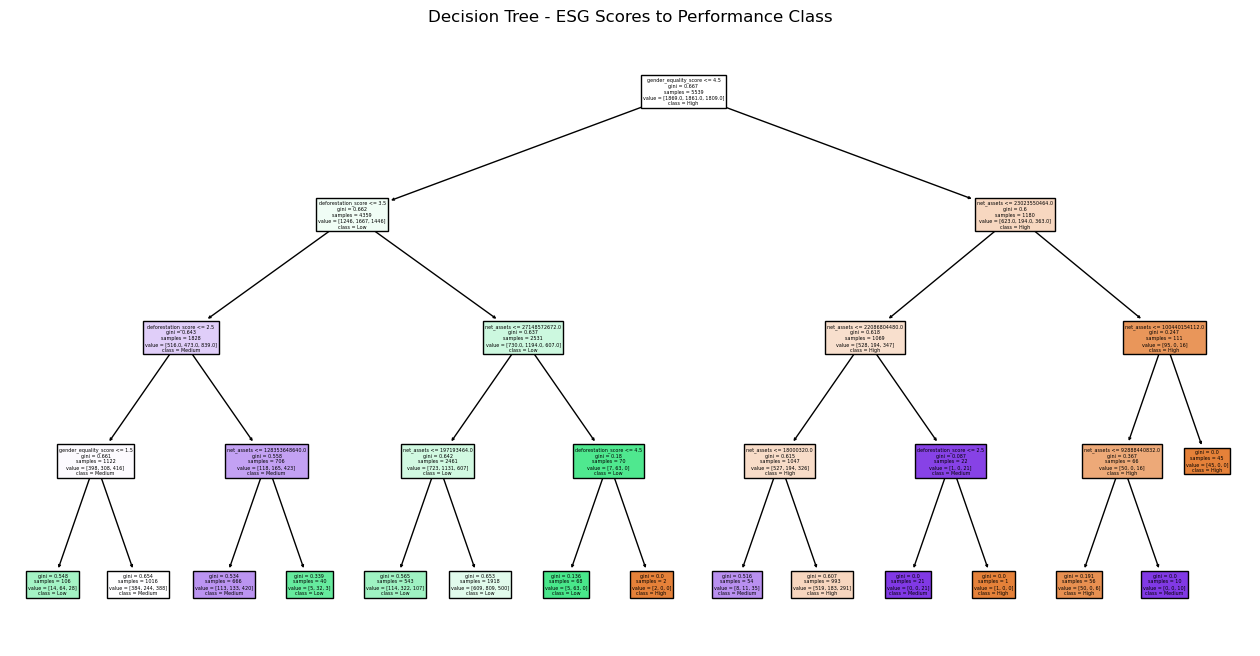

In [26]:
# Step 4: Plot the tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree - ESG Scores to Performance Class")
plt.show()